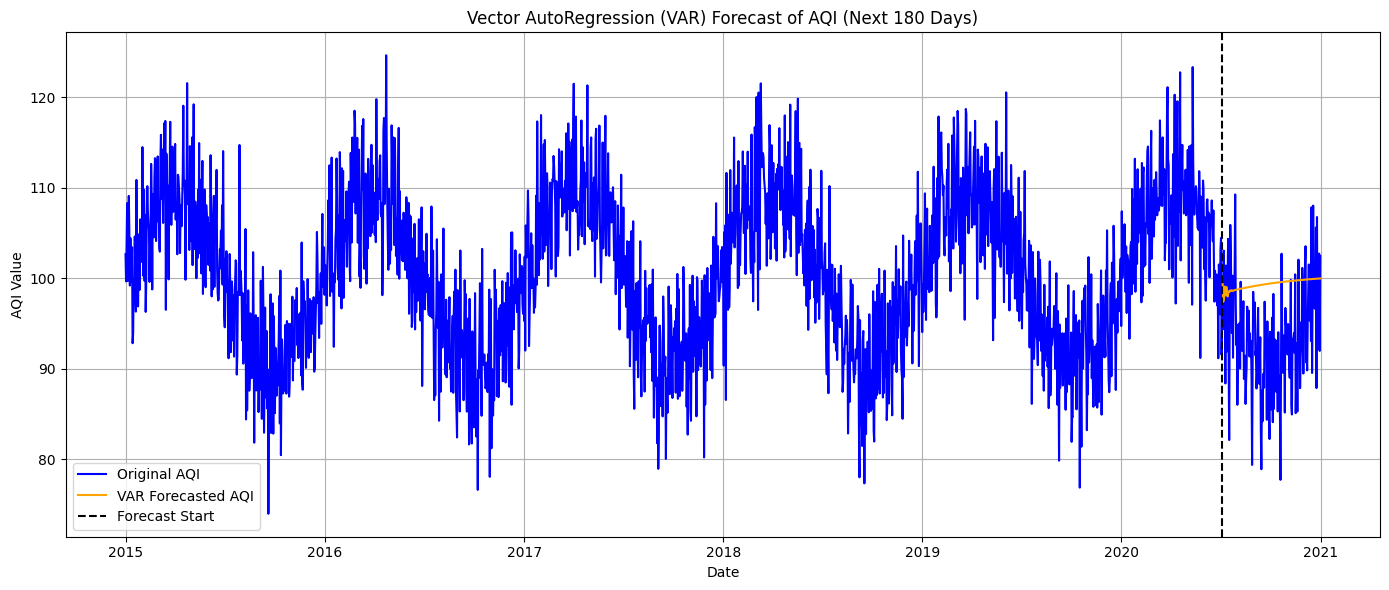

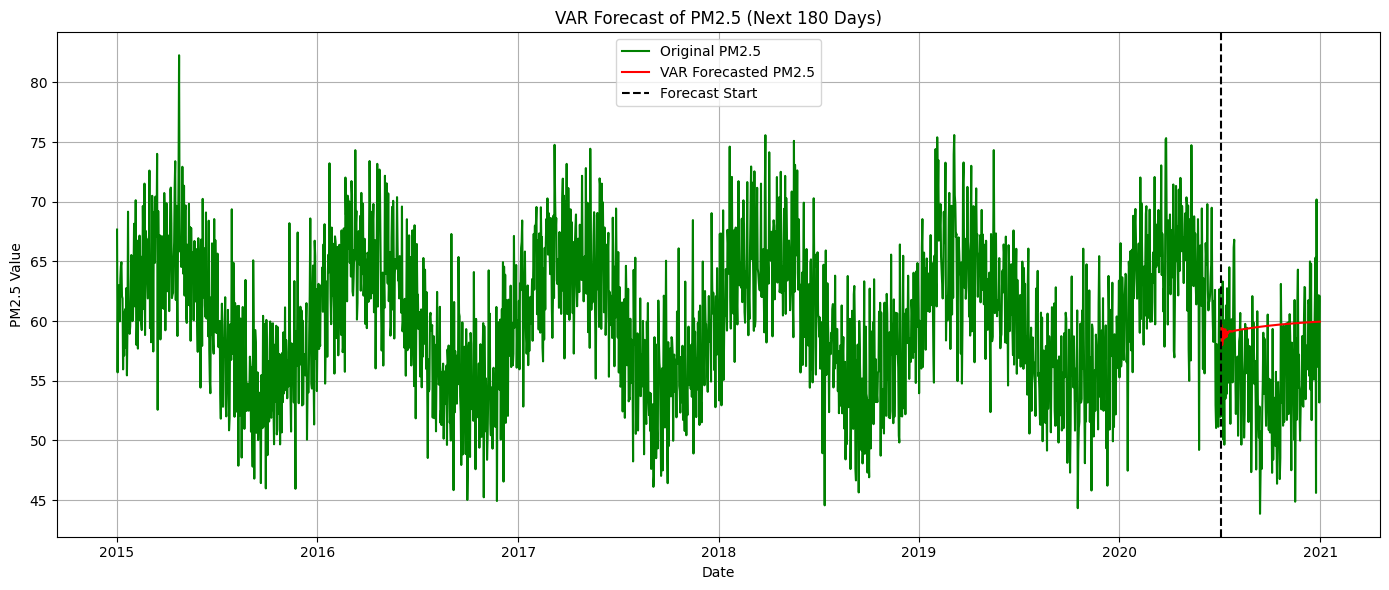

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Step 1: Generate synthetic AQI dataset
np.random.seed(42)
date_range = pd.date_range(start='2015-01-01', end='2020-12-31', freq='D')
aqi_values = 100 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365.25) + np.random.normal(0, 5, len(date_range))

# Step 2: Create a second variable (e.g., PM2.5) that is correlated with AQI
pm25_values = aqi_values * 0.6 + np.random.normal(0, 3, len(date_range))

# Step 3: Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'AQI': aqi_values,
    'PM25': pm25_values
})
df.set_index('Date', inplace=True)

# Step 4: Handle missing values and ensure proper frequency
df = df.asfreq('D').interpolate()

# Step 5: Train/test split (we'll forecast 180 days)
train = df[:-180]
test = df[-180:]

# Step 6: Fit VAR model
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')  # automatic lag selection

# Step 7: Forecast
lag_order = results.k_ar
forecast_input = train.values[-lag_order:]
forecast = results.forecast(y=forecast_input, steps=180)

# Step 8: Create forecast DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['AQI_forecast', 'PM25_forecast'])

# Step 9: Plot AQI forecast
plt.figure(figsize=(14, 6))
plt.plot(df['AQI'], label='Original AQI', color='blue')
plt.plot(forecast_df['AQI_forecast'], label='VAR Forecasted AQI', color='orange')
plt.axvline(x=train.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.title('Vector AutoRegression (VAR) Forecast of AQI (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Plot PM2.5 forecast
plt.figure(figsize=(14, 6))
plt.plot(df['PM25'], label='Original PM2.5', color='green')
plt.plot(forecast_df['PM25_forecast'], label='VAR Forecasted PM2.5', color='red')
plt.axvline(x=train.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.title('VAR Forecast of PM2.5 (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
